In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [20]:
df = pd.read_csv('Trips_2018.csv',index_col=0)

In [21]:
print(df.head())

   tripduration                 starttime                  stoptime  \
0           970  2018-01-01 13:50:57.4340  2018-01-01 14:07:08.1860   
1           723  2018-01-01 15:33:30.1820  2018-01-01 15:45:33.3410   
2           496  2018-01-01 15:39:18.3370  2018-01-01 15:47:35.1720   
3           306  2018-01-01 15:40:13.3720  2018-01-01 15:45:20.1910   
4           306  2018-01-01 18:14:51.5680  2018-01-01 18:19:57.6420   

   start_station_id  start_station_latitude  start_station_longitude  \
0              72.0               40.767272               -73.993929   
1              72.0               40.767272               -73.993929   
2              72.0               40.767272               -73.993929   
3              72.0               40.767272               -73.993929   
4              72.0               40.767272               -73.993929   

   end_station_id  end_station_latitude  end_station_longitude  bikeid  \
0           505.0             40.749013             -73.988484   3

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17548339 entries, 0 to 17548338
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start_station_id         float64
 4   start_station_latitude   float64
 5   start_station_longitude  float64
 6   end_station_id           float64
 7   end_station_latitude     float64
 8   end_station_longitude    float64
 9   bikeid                   int64  
 10  usertype                 object 
 11  birth_year               int64  
 12  gender                   int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 1.8+ GB
None


In [50]:
print(df.describe())

       tripduration  start_station_id  start_station_latitude  \
count  1.754834e+07      1.754584e+07            1.754834e+07   
mean   9.887432e+02      1.589282e+03            4.073737e+01   
std    1.889584e+04      1.439432e+03            3.225813e-02   
min    6.100000e+01      7.200000e+01            4.064654e+01   
25%    3.580000e+02      3.800000e+02            4.071755e+01   
50%    6.050000e+02      5.050000e+02            4.073818e+01   
75%    1.060000e+03      3.249000e+03            4.075763e+01   
max    1.951005e+07      3.721000e+03            4.550636e+01   

       start_station_longitude  end_station_id  end_station_latitude  \
count             1.754834e+07    1.754584e+07          1.754834e+07   
mean             -7.398260e+01    1.580830e+03          4.073704e+01   
std               1.912753e-02    1.438502e+03          3.206583e-02   
min              -7.402535e+01    7.200000e+01          4.064654e+01   
25%              -7.399521e+01    3.800000e+02        

In [52]:
print((df['start_station_latitude'] > 45).sum())
print((df['start_station_id'].nunique()))

81
818


In [40]:
from sklearn.cluster import DBSCAN, KMeans


In [37]:
dbs =DBSCAN(min_samples=2000, eps=0.001)#When you use the full dataset, change min_samples to 2000

coordinates_station = df[['start_station_id','start_station_latitude','start_station_longitude']]

In [53]:
K = 30
kmeans = KMeans(n_clusters=K, random_state=0)
coordinates_station['clusters'] = kmeans.fit_predict(coordinates_station.iloc[:, 1:3])

C:\Users\Ludvig\AppData\Local\Temp\ipykernel_9436\413118462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coordinates_station['clusters'] = kmeans.fit_predict(coordinates_station.iloc[:, 1:3])


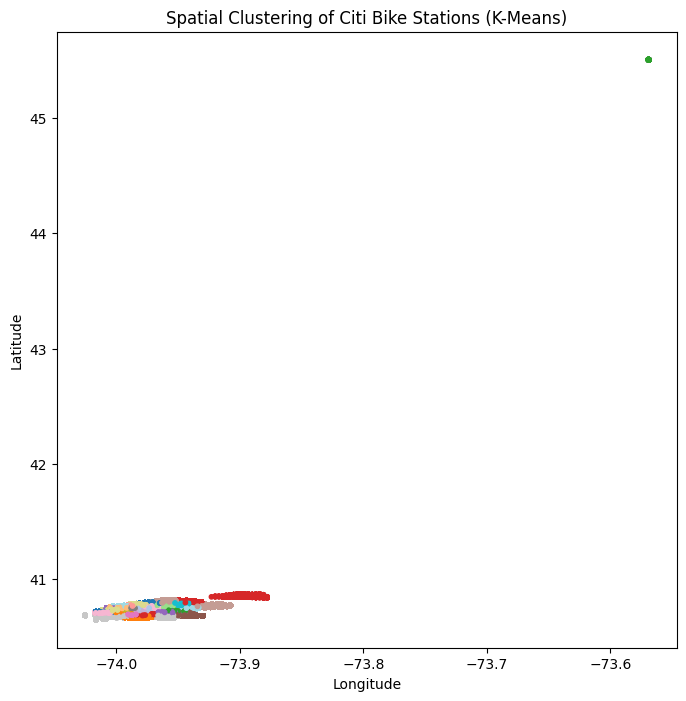

In [54]:
coordinates_station['clusters'].value_counts().sort_index()
plt.figure(figsize=(8,8))
plt.scatter(coordinates_station['start_station_longitude'], coordinates_station['start_station_latitude'], c=coordinates_station['clusters'], cmap='tab20', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Clustering of Citi Bike Stations (K-Means)')
plt.show()


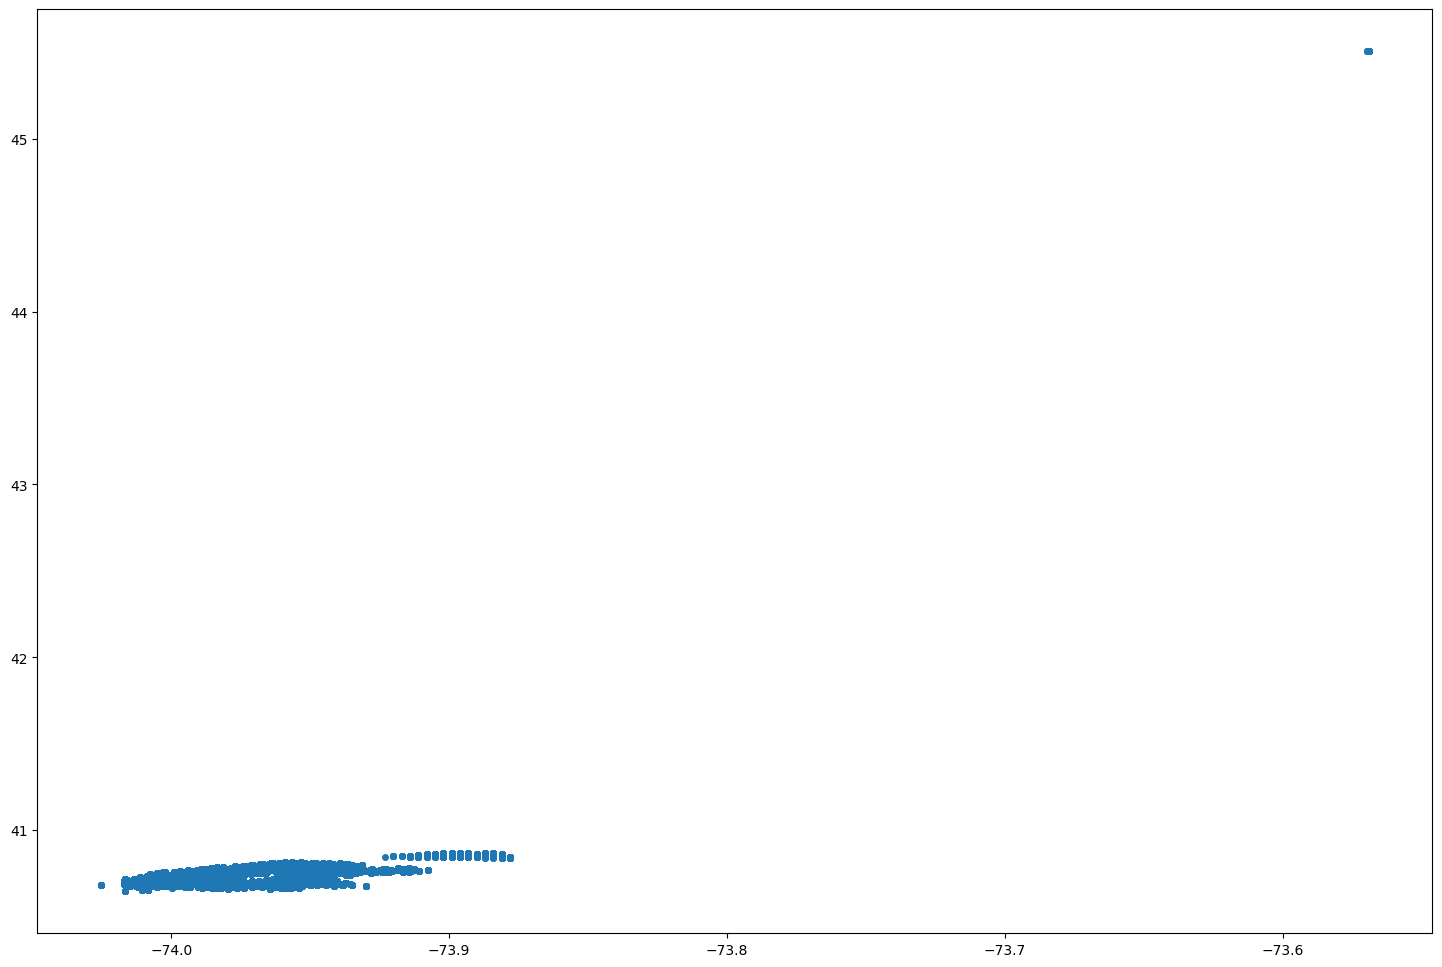

In [38]:
plt.figure(figsize=(18, 12))
plt.plot(df['start_station_longitude'], df['start_station_latitude'], 'o', markersize=4)

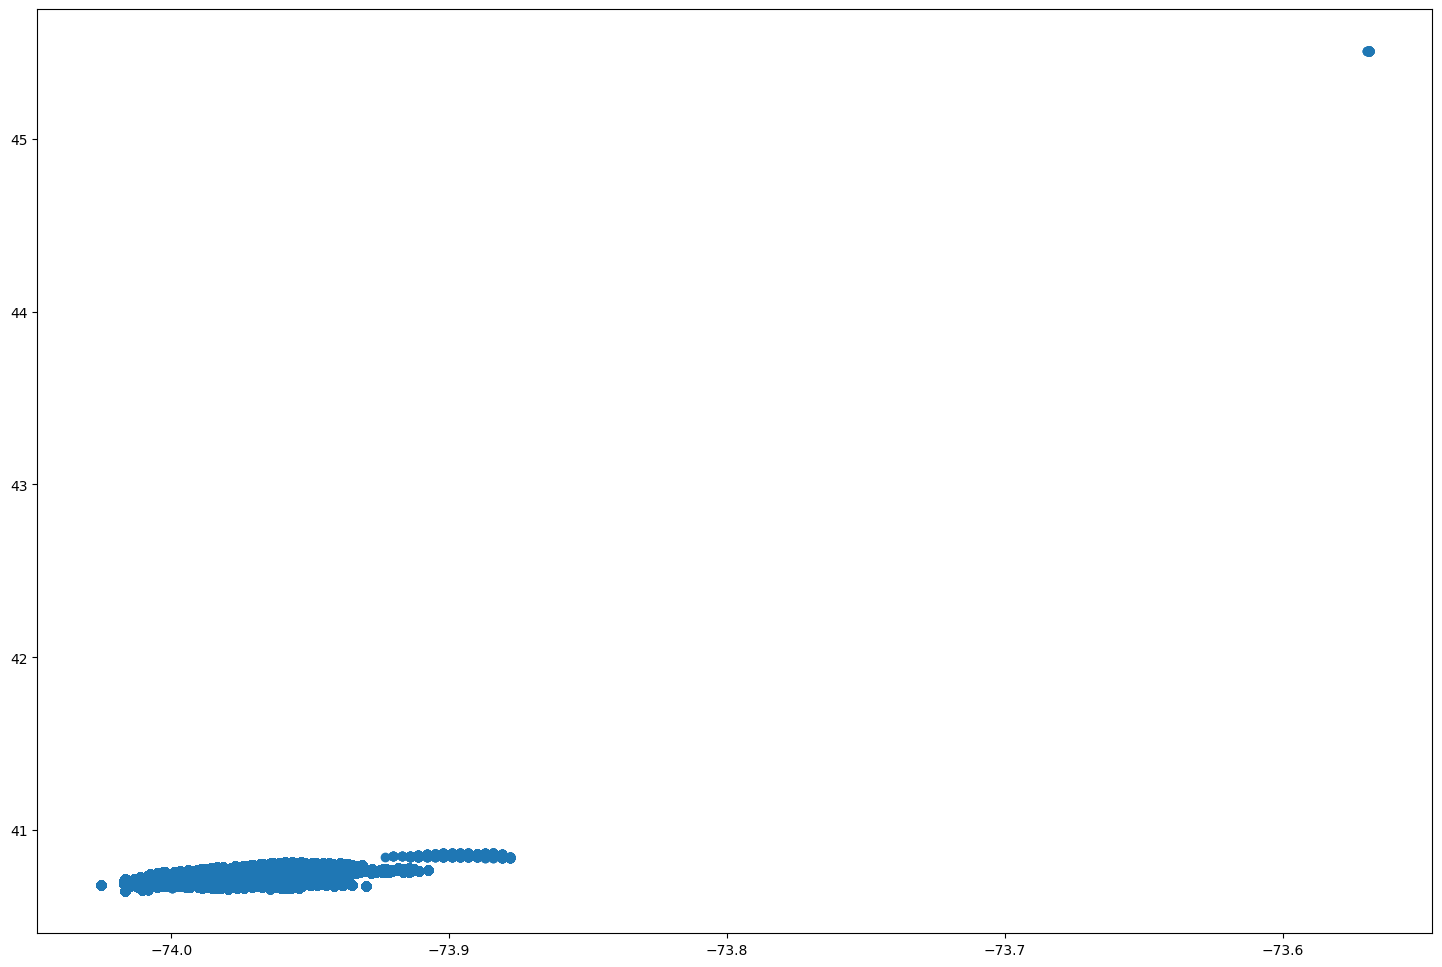

In [34]:
plt.figure(figsize=(18, 12))
plt.scatter(df['start_station_longitude'], df['start_station_latitude'])

In [27]:
dbs.fit(coordinates_station)
num_colors = len(set(dbs.labels_))
import random
from matplotlib import colors as mcolors

colors=list(mcolors.CSS4_COLORS.keys())
cluster_colors=random.choices(colors, k=num_colors)

(40.64653836709648, 45.506364054011385)

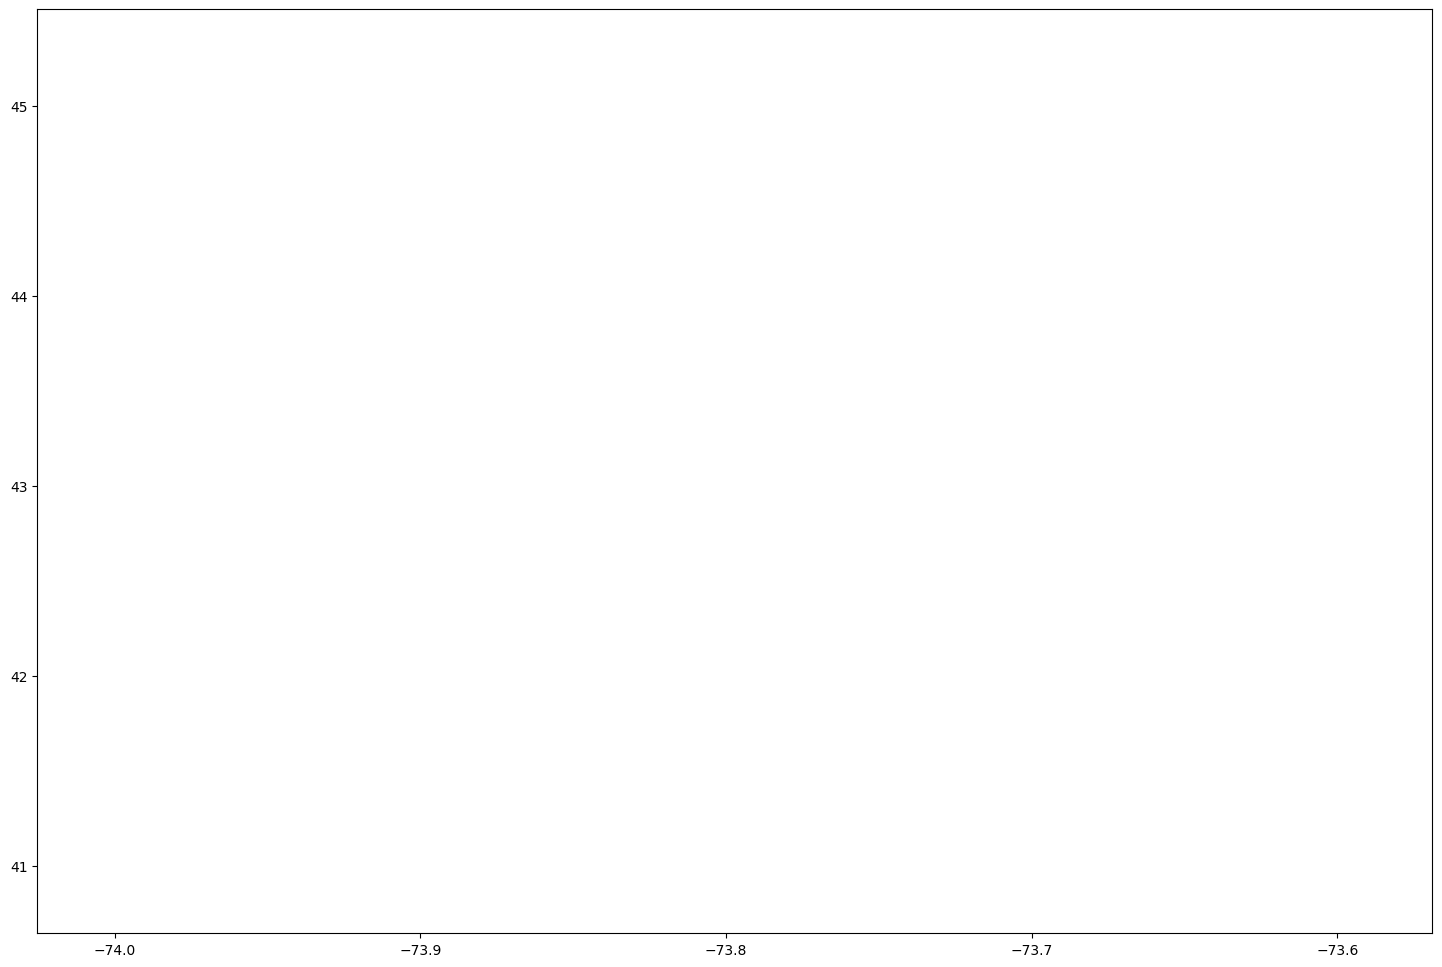

In [18]:
#plt.scatter(f_points['pickup_longitude'], f_points['pickup_latitude'], s=0.01);

x_=[]
y_=[]
c_=[]
for label, x, y  in zip(dbs.labels_, df['start_station_latitude'], df['start_station_longitude']):
    if label!=-1:
        x_.append(x)
        y_.append(y)
        c_.append(cluster_colors[label])
plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=4,c=c_)

# Setting the same axis, just for reading the results 
plt.xlim((min(df['start_station_longitude']), max(df['start_station_longitude'])))
plt.ylim((min(df['start_station_latitude']), max(df['start_station_latitude'])))

(40.64653836709648, 45.506364054011385)

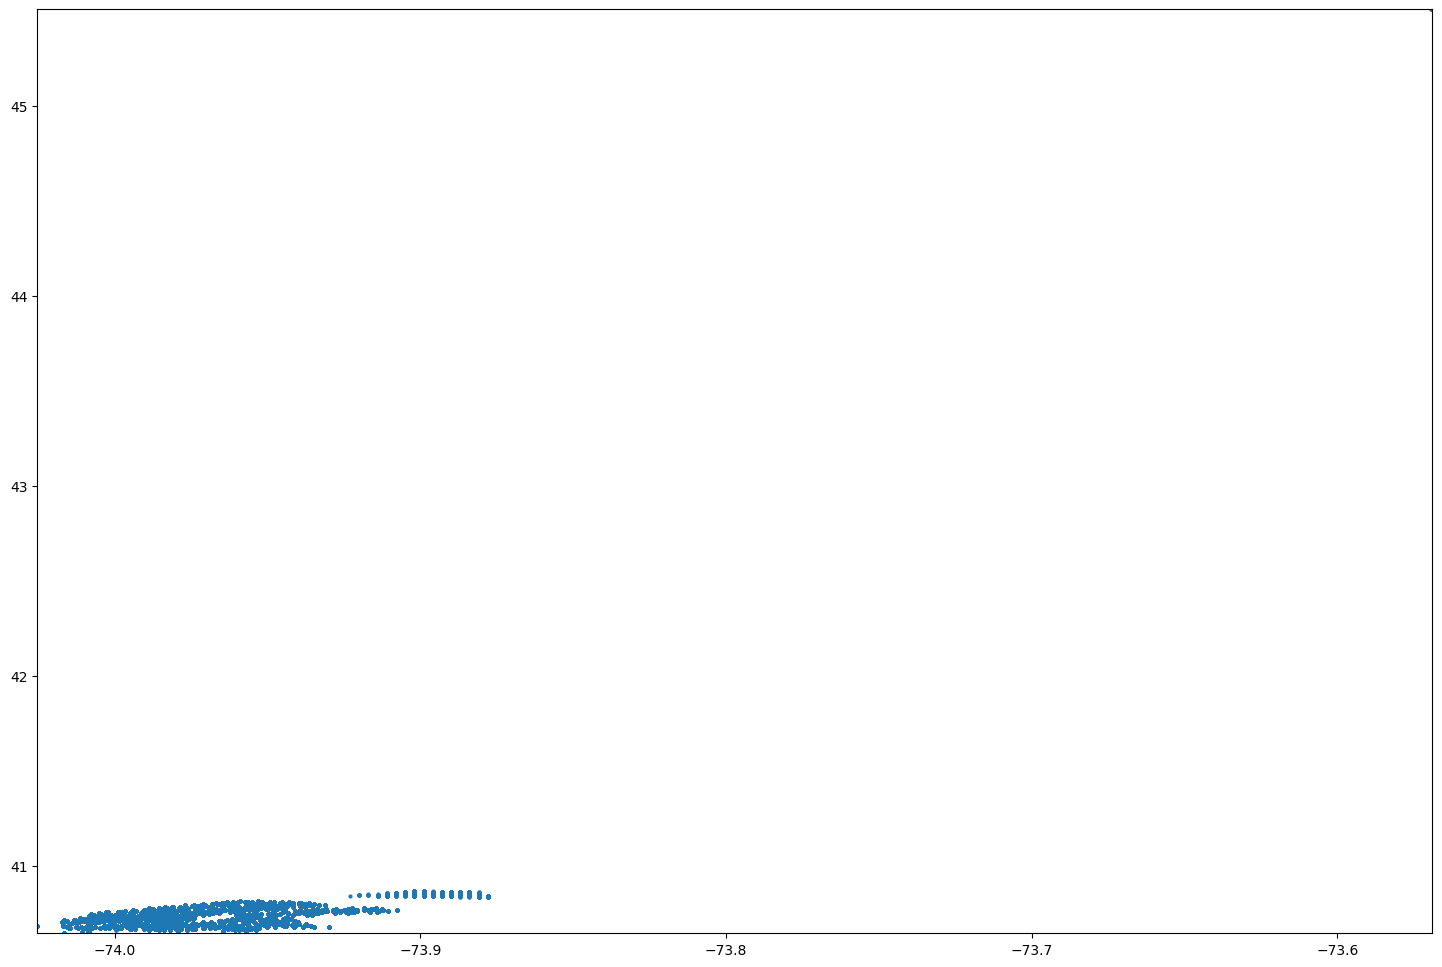

In [19]:
# It can help to plot all coordinates. So among all pickups locations (below), based on the results of DBSCAN (above) it should be easy to say where :)
plt.figure(figsize=(18, 12))
plt.scatter(df['start_station_longitude'], df['start_station_latitude'],s=4)

plt.xlim((min(df['start_station_longitude']), max(df['start_station_longitude'])))
plt.ylim((min(df['start_station_latitude']), max(df['start_station_latitude'])))

In [55]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

df['date'] = df['starttime'].dt.date
df['hour'] = df['starttime'].dt.hour